<h1><strong>CSE 555 - Introduction to Pattern Recognition</strong></h1>

<h2><strong>Programming Assignment 4:- Convolutional Neural Network</strong></h2>
<h4><strong> Jyoti Sinha</strong></h4>

<h3> Importing Libraries</h3>



In [ ]:
#Importing library
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
%matplotlib inline
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
!pip install keras==2.3.0
from keras.optimizers import SGD
from keras import regularizers
from keras.regularizers import l2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


     |████████████████████████████████| 378kB 2.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


<h3> Loading Dataset</h3>

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


<h3> Reshaping the dataset</h3>

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

<h3> Normalize the Dataset</h3>

In [ ]:
# Normalize the inputs
x_train = x_train / 255
x_test = x_test / 255

<h3> One-hot Encoding</h3>

In [ ]:
# One hot encoding on the output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

<h3> Define Model</h3>

In [ ]:
# define the model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        17344     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1199 - accuracy: 0.9627 - val_loss: 0.0609 - val_accuracy: 0.9813
Epoch 2/2
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0342 - val_accuracy: 0.9875


<h3> Accuracy Calculation</h3>

In [ ]:
#Accuracy Calculation
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_acc*100)

10000/10000 [==============================] - 3s 251us/step
98.7500011920929


In [ ]:
 print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


<h3> Graph of Training Loss Vs Epoch

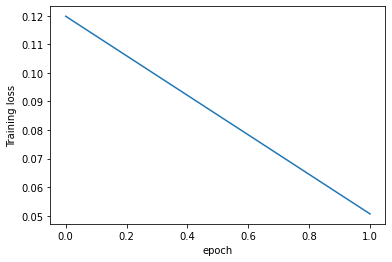

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('Training loss')
plt.xlabel('epoch')
plt.show()


<h3> Graph of Validation loss vs epoch</h3>

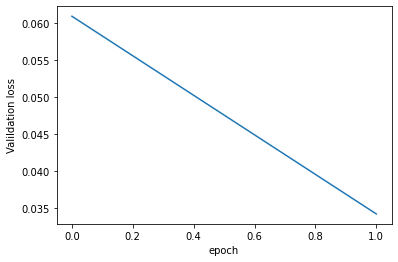

In [ ]:
#Plot between Validation loss vs epoch
plt.plot(history.history['val_loss'])
plt.ylabel('Valildation loss')
plt.xlabel('epoch')
plt.show()

<h3> Graph between Training Loss and Validation Loss</h3>

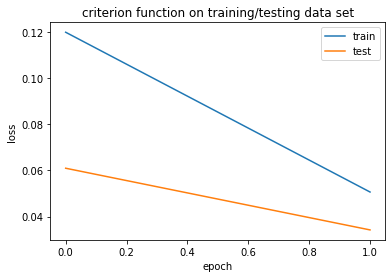

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3> Calculation of Training and Testing Error</h3>

In [ ]:
Training_error=(history.history['accuracy'])
Validation_error=(history.history['val_accuracy'])
for i in range(len(Training_error)):
  Training_error[i]= 1- Training_error[i]
for i in range(len(Validation_error)):
  Validation_error[i]= 1- Validation_error[i]


<h3> Plot of Training Error</h3>

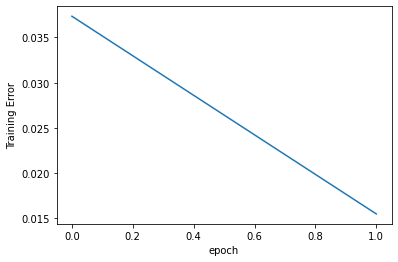

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Training_error)
plt.ylabel('Training Error')
plt.xlabel('epoch')
plt.show()

<h3> Plot of Testing error

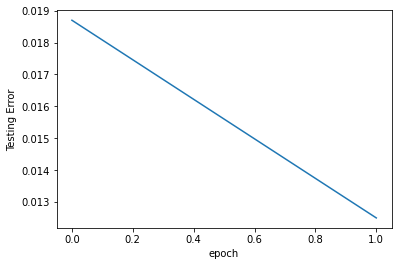

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Validation_error)
plt.ylabel('Testing Error')
plt.xlabel('epoch')
plt.show()